### After clean the Car now i have decied to use `Linear Regression` for the prediction.

So for use that i have to make some assumtion and make them true so it can give me support fot use the `Linear Regression`.

Because I know that `Linear Regression` algorith only work when the relation with features with the target column is linear.

I don't need to focus the categorical columns because those will be converted as dummies variable. 

all I have problem with numerical columns. like `Mileage`, `EngineV`, and `Year`

In [58]:
# importing relevent library
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


sns.set() # all plot will cover on seaborn style

In [59]:
# loading the data
car = pd.read_csv('Car_cleaned.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


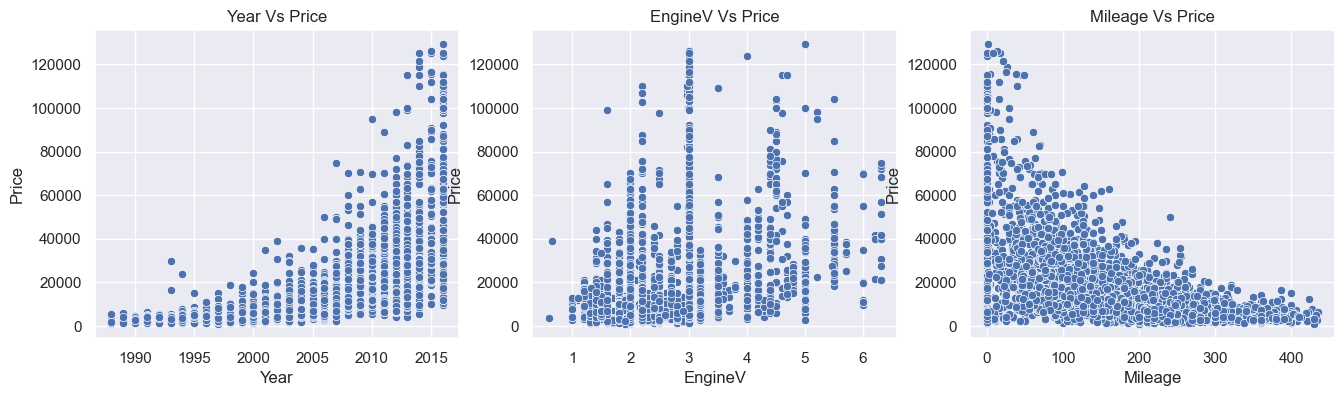

In [60]:
# plotting all the three numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['Price']);
plt.title('Year Vs Price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['Price']);
plt.title('EngineV Vs Price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['Price']);
plt.title('Mileage Vs Price');


#### Now I can see that the relation is anything but not linear. I can not run `Linear Regression` in here.

We have to transform these column

Text(0.5, 1.0, 'Price')

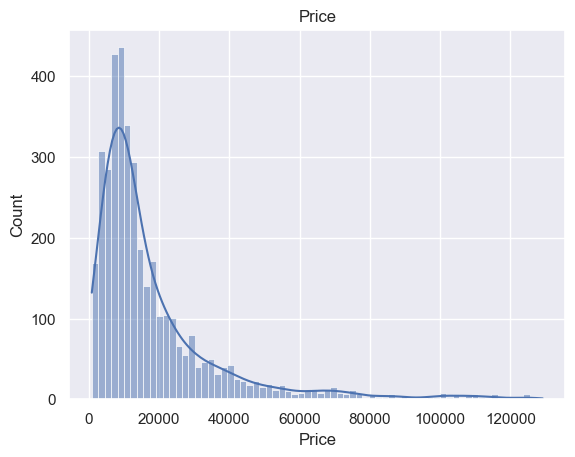

In [61]:
## Checking the price
sns.histplot(car['Price'],kde=True)
plt.title('Price')

The problem lies with the price, the price we have in the data is not linear.

Common approch form many others to transform the data is `log transformation`.

`Numpy` has a methode which calculate natural log which is `np.log(x)` it return natural logarithm of a number or arrays.

In [62]:
# transfor the price
log_price = np.log(car['Price'])

# adding another column 
car['log_price'] = log_price

# checking the data again
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Mileage Vs log_price')

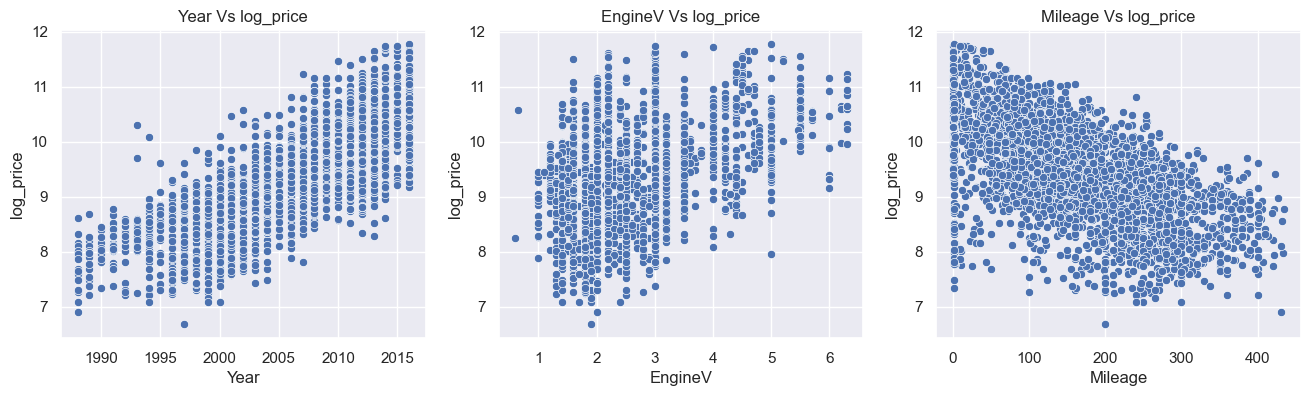

In [63]:
# plotting all the three numerical columns again with log price
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']);
plt.title('Year Vs log_price')

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']);
plt.title('EngineV Vs log_price')

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']);
plt.title('Mileage Vs log_price')

#### Now whole picture change. 
Here we can obserbeve the linearity of the data with Price column

In [64]:
# droping the Original price column that is no longer needed
car.drop('Price', axis=1, inplace=True)

Up to Now 

* The data have linar relation with target column.
* The is almost normally distributed, that is I take care in previous car cleaning process by taking 99th percentile.


### Now check the Multicollinearity.

this is oocure when the feature of the data is corealeted with other feature.

In [65]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

There can be some multicollinearity in the data that can be assumed like the newer the car will be mileage will be lower. so `Year` and `Milage` will be correleated.

I will use the VIF or Variance inflation factor to check the multicolinearity.

The VIF produce a measure which estimate how much larger the square root of the standerd error of the estimate is compared to a situation wher the variable was completely uncorreleated with other features.


In [66]:
# import VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# taking only numerical column beacuse the categorical will be converted as dummy variable
var = car[['Mileage', 'Year', 'EngineV']]
# var become a dataframe with only three columns


# craating a dataframe
vif_df = pd.DataFrame()

# adding column
vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['features'] = var.columns

# checking the result
vif_df

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Now here how it works.

When there is result `1` that means there is no multicolinearity this is also the minimum value of the measure. but it has no upper limit.

Generaly the values are between `1 to 5` or `1< VIF < 5` are consider ok, but it is depend on the problem on hand and the devoloper. he/she will decied the cut-off value from his past experience.

From the result i have got look like the `Year` column is too much corelated with other column. and it will down others feature values. it will be good to drop down the year. column

This [article](https://statisticalhorizons.com/multicollinearity) has more about it.

In [67]:
# deop the year
car.drop('Year', axis=1, inplace=True)

car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Now taking care about categorical columns

`Brand`, `Body`, `Engine Type` and `Registration`

In [68]:
# checking the datatypes 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


I will use `pandas` `.get_dummies()` methode for this it will create a new column for all the categorical values. it will increase the dimention of the data.

In [69]:
car_dum = pd.get_dummies(car, drop_first=True) 

# checking the data
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


#### Reaange the column

In [70]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [71]:
# creating new arranged column
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

# creating new data frame
car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [72]:
# saving the last preproccesed data in csv file for model creating
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


In [73]:
### Here the data preprocessing and EDA is over.
